### 一.原理介绍
这一节将树模型的预测与概率分布相结合，我们假设树模型的输出服从某一分布，而我们的目标是使得该输出的概率尽可能的高，如下图所示
![avatar](./source/10_集成学习_极大似然估计.png)

而概率值最高的点通常由分布中的某一个参数（通常是均值）反映，所以我们将树模型的输出打造为分布中的该参数项，然后让树模型的输出去逼近极大似然估计的结果即可，即：   

$$
\hat{y}\rightarrow \mu_{ML}
$$   

下面分别介绍possion回归，gamma回归，tweedie回归，负二项回归的具体求解

### 二.泊松回归
泊松分布的表达式如下：    

$$
P(y\mid\lambda)=\frac{\lambda^y}{y!}e^{-\lambda}
$$  

其中，$y$是我们的目标输出，$\lambda$为模型参数，且$\lambda$恰为该分布的均值，由于泊松分布要求$y>0$，所以我们对$\hat{y}$取指数去拟合$\lambda$，即令：   

$$
\lambda=e^{\hat{y}}
$$   

对于$N$个样本，其似然函数可以表示如下：  

$$
\prod_{i=1}^N\frac{e^{y_i\hat{y_i}}e^{-e^{\hat{y_i}}}}{y_i!}
$$   

由于$y_i!$是常数，可以去掉，并对上式取负对数，转换为求极小值的问题：  

$$
L(y,\hat{y})=\sum_{i=1}^N(e^{\hat{y_i}}-y_i\hat{y_i})
$$  

所以，一阶导和二阶导分别为：   

$$
\frac{\partial L(y,\hat{y})}{\partial \hat{y}}=e^{\hat{y}}-y\\
\frac{\partial^2 L(y,\hat{y})}{{\partial \hat{y}}^2}=e^{\hat{y}}\\
$$   

### 三.gamma回归
gamma分布如下：   

$$
p(y\mid\alpha,\lambda)=\frac{1}{\Gamma(\alpha)\lambda^\alpha}y^{\alpha-1}e^{-y/\lambda}
$$  

其中，$y>0$为我们的目标输出，$\alpha$为形状参数，$\lambda$为尺度参数，$\Gamma(\cdot)$为Gamma函数（后续推导这里会被省略，所以就不列出来了），而Gamma分布的均值为$\alpha\lambda$，这里不好直接变换，我们令$\alpha=1/\phi,\lambda=\phi\mu$，所以现在Gamma分布的均值可以表示为$\mu$，此时的Gamma分布为：   

$$
p(y\mid\mu,\phi)=\frac{1}{y\Gamma(1/\phi)}(\frac{y}{\mu\phi})^{1/\phi}exp[-\frac{y}{\mu\phi}]
$$  

此时，$\mu$看做Gamma分布的均值参数，而$\phi$为它的离散参数，在均值给定的情况下，若离散参数越大，Gamma分布的离散程度越大，接下来对上面的表达式进一步变换：   

$$
p(y\mid\mu,\phi)=exp[\frac{-y/\mu-ln\mu}{\phi}+\frac{1-\phi}{\phi}lny-\frac{ln\phi}{\phi}-ln\Gamma(\frac{1}{\phi})]
$$  

同泊松分布一样，我们可以令：   

$$
\mu=e^{\hat{y}}
$$  

又由于$\mu$与$\phi$无关，所以做极大似然估计时可以将$\phi$看做常数，我们将对数似然函数的负数看做损失函数，可以写作如下：   

$$
L(y,\hat{y})=\sum_{i=1}^N(\frac{y_i}{e^{\hat{y_i}}}+\hat{y_i})
$$  

所以，一阶导和二阶导就可以写出来啦：   

$$
\frac{\partial L(y,\hat{y})}{\partial \hat{y}}=1-ye^{-\hat{y}}\\
\frac{\partial^2 L(y,\hat{y})}{{\partial \hat{y}}^2}=ye^{-\hat{y}}\\
$$  

注意：上面的两个向量是按元素相乘

### 四.tweedie回归
tweedie回归是多个分布的组合体，包括gamma分布，泊松分布，高斯分布等，tweedie回归由一个超参数$p$控制，$p$不同，则其对应的对数似然函数也不同：   

$$
g(y,\phi)+\left\{\begin{matrix}
\frac{1}{\phi}(ylog(\mu)-\frac{\mu^{2-p}}{2-p}) &  p=1\\ 
\frac{1}{\phi}(y\frac{\mu^{1-p}}{1-p}-log\mu) & p=2 \\ 
\frac{1}{\phi}(y\frac{\mu^{1-p}}{1-p}-\frac{\mu^{2-p}}{2-p}) & p\neq 1,p\neq 2
\end{matrix}\right.
$$  

同样的，我们可以令：   

$$
\mu=e^{\hat{y}}
$$  

由于除开$\mu$以外的都可以视作常数项，所以损失函数可以简化为：   

$$
L(y,\hat{y})=\left\{\begin{matrix}
\sum_{i=1}^n(\frac{e^{\hat{y_i}(2-p)}}{2-p}-y_i\hat{y_i})=\sum_{i=1}^n(e^{\hat{y_i}}-y_i\hat{y_i}) &  p=1\\ 
\sum_{i=1}^n(\hat{y_i}+y_ie^{-\hat{y_i}}) & p=2 \\ 
\sum_{i=1}^n(\frac{exp[\hat{y_i}(2-p)]}{2-p}-y_i\frac{exp[\hat{y_i}(1-p)]}{1-p}) & p\neq 1,p\neq 2
\end{matrix}\right.
$$   

所以，一阶导：   

$$
\frac{\partial L(y,\hat{y})}{\partial \hat{y}}=\left\{\begin{matrix}
e^{\hat{y}}-y &  p=1\\ 
1-ye^{-\hat{y}} & p=2 \\ 
e^{\hat{y}(2-p)}-ye^{\hat{y}(1-p)} & p\neq 1,p\neq 2
\end{matrix}\right.
$$

二阶导：   

$$
\frac{\partial^2 L(y,\hat{y})}{{\partial \hat{y}}^2}=\left\{\begin{matrix}
e^{\hat{y}} &  p=1\\ 
ye^{-\hat{y}} & p=2 \\ 
(2-p)e^{\hat{y}(2-p)}-(1-p)ye^{\hat{y}(1-p)} & p\neq 1,p\neq 2
\end{matrix}\right.
$$

### 五.代码实现
基于上一节的计算框架，略作调整即可实现....

In [10]:
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline
from ml_models.ensemble import XGBoostBaseTree
from ml_models import utils
import copy
import numpy as np

"""
xgboost回归树的实现，封装到ml_models.ensemble
"""

class XGBoostRegressor(object):
    def __init__(self, base_estimator=None, n_estimators=10, learning_rate=1.0, loss='squarederror', p=2.5):
        """
        :param base_estimator: 基学习器
        :param n_estimators: 基学习器迭代数量
        :param learning_rate: 学习率，降低后续基学习器的权重，避免过拟合
        :param loss:损失函数，支持squarederror、logistic、poisson,gamma,tweedie
        :param p:对tweedie回归生效
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        if self.base_estimator is None:
            # 默认使用决策树桩
            self.base_estimator = XGBoostBaseTree()
        # 同质分类器
        if type(base_estimator) != list:
            estimator = self.base_estimator
            self.base_estimator = [copy.deepcopy(estimator) for _ in range(0, self.n_estimators)]
        # 异质分类器
        else:
            self.n_estimators = len(self.base_estimator)
        self.loss = loss
        self.p = p

    def _get_gradient_hess(self, y, y_pred):
        """
        获取一阶、二阶导数信息
        :param y:真实值
        :param y_pred:预测值
        :return:
        """
        if self.loss == 'squarederror':
            return y_pred - y, np.ones_like(y)
        elif self.loss == 'logistic':
            return utils.sigmoid(y_pred) - utils.sigmoid(y), utils.sigmoid(y_pred) * (1 - utils.sigmoid(y_pred))
        elif self.loss == 'poisson':
            return np.exp(y_pred) - y, np.exp(y_pred)
        elif self.loss == 'gamma':
            return 1.0 - y * np.exp(-1.0 * y_pred), y * np.exp(-1.0 * y_pred)
        elif self.loss == 'tweedie':
            if self.p == 1:
                return np.exp(y_pred) - y, np.exp(y_pred)
            elif self.p == 2:
                return 1.0 - y * np.exp(-1.0 * y_pred), y * np.exp(-1.0 * y_pred)
            else:
                return np.exp(y_pred * (2.0 - self.p)) - y * np.exp(y_pred * (1.0 - self.p)), (2.0 - self.p) * np.exp(
                    y_pred * (2.0 - self.p)) - (1.0 - self.p) * y * np.exp(y_pred * (1.0 - self.p))

    def fit(self, x, y):
        y_pred = np.zeros_like(y)
        g, h = self._get_gradient_hess(y, y_pred)
        for index in range(0, self.n_estimators):
            self.base_estimator[index].fit(x, g, h)
            y_pred += self.base_estimator[index].predict(x) * self.learning_rate
            g, h = self._get_gradient_hess(y, y_pred)

    def predict(self, x):
        rst_np = np.sum(
            [self.base_estimator[0].predict(x)] +
            [self.learning_rate * self.base_estimator[i].predict(x) for i in
             range(1, self.n_estimators - 1)] +
            [self.base_estimator[self.n_estimators - 1].predict(x)]
            , axis=0)
        if self.loss in ["poisson", "gamma", "tweedie"]:
            return np.exp(rst_np)
        else:
            return rst_np

对泊松、gamma、tweedie回归做测试

In [11]:
data = np.linspace(1, 10, num=100)
target = np.sin(data) + np.random.random(size=100) + 1  # 添加噪声
data = data.reshape((-1, 1))

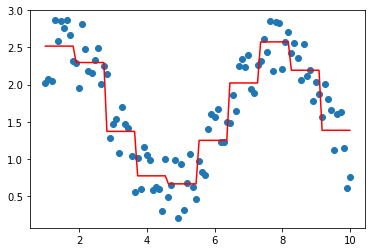

In [12]:
model = XGBoostRegressor(loss='poisson')
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

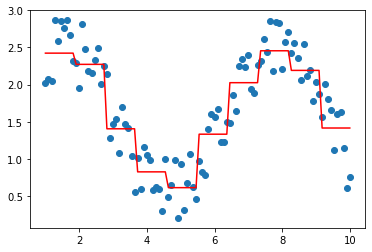

In [13]:
model = XGBoostRegressor(loss='gamma')
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

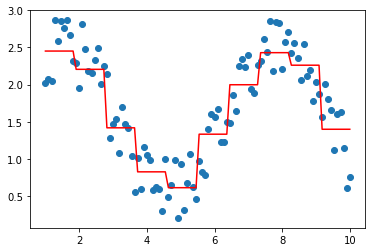

In [14]:
model = XGBoostRegressor(loss='tweedie',p=2.5)
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

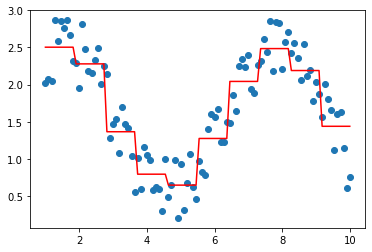

In [15]:
model = XGBoostRegressor(loss='tweedie',p=1.5)
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

上面的拟合结果，看不出明显区别....,接下来对tweedie分布中`p`取极端值做一个简单探索...，可以发现取值过大或者过小都有可能陷入欠拟合

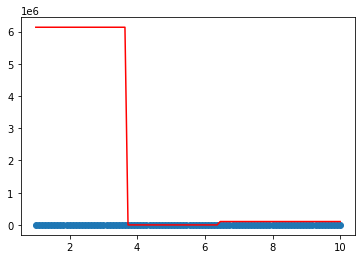

In [16]:
model = XGBoostRegressor(loss='tweedie',p=0.1)
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

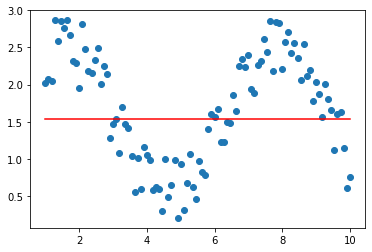

In [17]:
model = XGBoostRegressor(loss='tweedie',p=20)
model.fit(data, target)
plt.scatter(data, target)
plt.plot(data, model.predict(data), color='r')

参考内容：  
http://www.doc88.com/p-9029670237688.html  
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html#families